# Logistic Regression

Logistic regression model to predict whether a patient will be readmitted to the hospital within 30 days of discharge or not.

In [1]:
# Importing all necessary Python libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load the cleaned and preprocessed dataset
model_diabetic_df = pd.read_csv('preprocessed_data.csv')

In [3]:
# Display a few rows of the newly-created DataFrame
model_diabetic_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_[20-30),age_[30-40),...,glipizide_Up,change_No,diabetesMed_Yes,insulin_No,insulin_Steady,insulin_Up,metformin_No,metformin_Steady,metformin_Up,readmitted
0,-1.115266,-0.104022,-0.812896,-1.769323,-0.262004,-0.203346,-0.294524,-3.131210,False,False,...,False,True,False,True,False,False,True,False,False,0
1,-0.437113,0.798134,-0.812896,0.276134,-0.262004,-0.203346,-0.294524,0.879498,False,False,...,False,False,True,False,False,True,True,False,False,0
2,-0.776190,-1.607616,2.028252,-0.325471,1.608992,-0.203346,1.361694,-0.624518,True,False,...,False,True,True,True,False,False,True,False,False,0
3,-0.776190,0.046337,-0.244667,0.035492,-0.262004,-0.203346,-0.294524,-0.123179,False,True,...,False,False,True,False,False,True,True,False,False,0
4,-1.115266,0.397175,-0.812896,-0.927076,-0.262004,-0.203346,-0.294524,-1.125856,False,False,...,False,False,True,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,1.597344,0.347056,0.323563,2.080948,-0.262004,-0.203346,-0.294524,0.879498,False,False,...,False,False,True,False,True,False,True,False,False,0
71514,3.292725,1.499811,2.596482,1.238701,-0.262004,1.760584,-0.294524,0.879498,False,False,...,False,False,True,False,False,True,True,False,False,0
71515,-0.776190,0.146576,2.596482,0.155813,0.673494,1.760584,1.361694,0.879498,False,False,...,False,True,True,False,True,False,True,False,False,0
71516,0.241039,1.650170,-0.244667,0.757417,-0.262004,1.760584,-0.294524,0.879498,False,False,...,False,False,True,False,False,True,True,False,False,0


In [4]:
# Get some basic info about the DataFrame
model_diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Columns: 352 entries, time_in_hospital to readmitted
dtypes: bool(343), float64(8), int64(1)
memory usage: 28.3 MB


In [5]:
# Separate the independent variables from the dependent variable
# X will store the independent variables
X = model_diabetic_df.drop('readmitted', axis = 1)

# y will store the target variable
y = model_diabetic_df['readmitted']

In [6]:
# Separate the dataset into training and testing sets - 30% for testing, 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [7]:
# Initalize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Fit the Logistic Regression model on the training data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Using the trained Logistic Regression model, make predictions on the test data
y_pred = lr.predict(X_test)

# Find out the predicted probabilities using the trained model
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [9]:
# Print out the confusion matrix to check the performance of the model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Confusion Matrix:
[[19563    13]
 [ 1861    19]]


In [10]:
# Print out the classification report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19576
           1       0.59      0.01      0.02      1880

    accuracy                           0.91     21456
   macro avg       0.75      0.50      0.49     21456
weighted avg       0.89      0.91      0.87     21456



In [11]:
# Print out the accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9126584638329605


In [12]:
# Print out the precision score
print(f'Precision: {precision_score(y_test, y_pred)}')

Precision: 0.59375


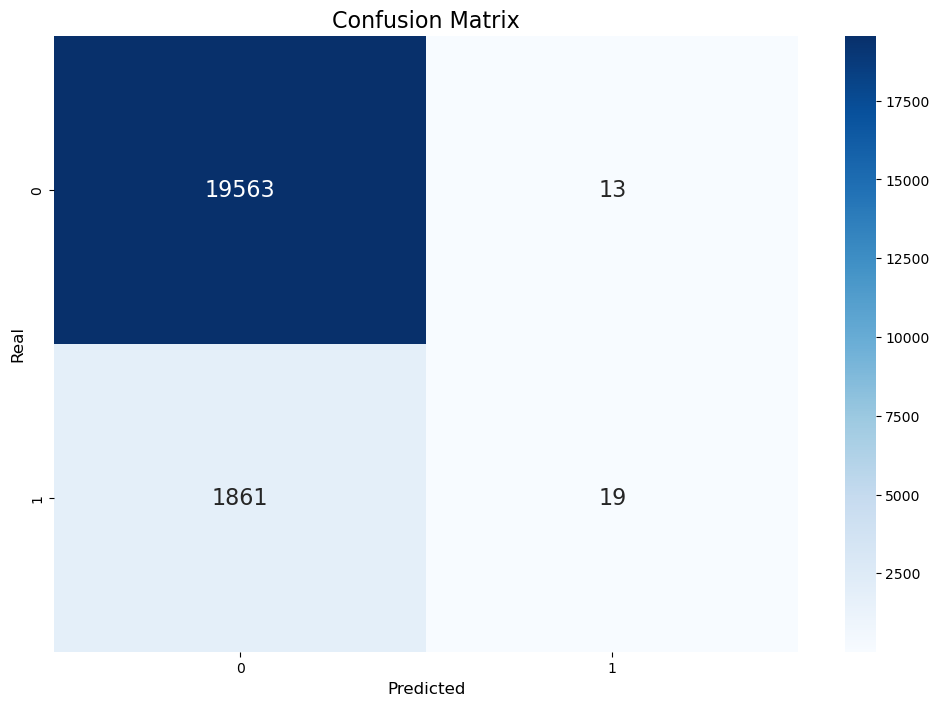

In [13]:
# Calculate the confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))

# Plot a heatmap to show the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Real', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# Save the confusion matrix as an image
plt.savefig('confusion_matrix.jpg')

# Show the heatmap
plt.show()

In [14]:
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(lr,f)
print('Saved successfully.')

Saved successfully.
